In [755]:
!pip3 install -r requirements.txt

Obtaining networkx from git+https://github.com/GuidiSara/networkx.git@06ef187506c895797992f4e19d4bca9d3d2aae10#egg=networkx (from -r requirements.txt (line 5))
  Cloning https://github.com/GuidiSara/networkx.git (to revision 06ef187506c895797992f4e19d4bca9d3d2aae10) to c:\users\guidi\desktop\università\laurea magistrale\primo anno\secondo semestre\ia\pokemon\src\networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6rc1.dev0
    Uninstalling networkx-2.6rc1.dev0:
      Successfully uninstalled networkx-2.6rc1.dev0
  Running setup.py develop for networkx


## Import

In [800]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Import dataset

In [801]:
pokemon = pd.read_csv('./pokemon.csv', index_col="#")
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

## Dataset visualization

Head Pokemon

In [721]:
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Head train

In [722]:
train.head()

,Winner,First_pokemon,Second_pokemon
0,643,219,643
1,691,691,585
2,148,140,148
3,742,604,742
4,784,313,784


Head test

In [723]:
test.head()

,Winner,First_pokemon,Second_pokemon
0,139,504,139
1,710,482,710
2,658,658,176
3,711,711,425
4,159,640,159


Pokemon info

In [724]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


Facendo info ed head ho notato che le colonne non sono tutte numeriche

Pokemon describe

In [725]:
pokemon.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Head test

In [726]:
test.head()

,Winner,First_pokemon,Second_pokemon
0,139,504,139
1,710,482,710
2,658,658,176
3,711,711,425
4,159,640,159


Train head

In [727]:
train.head()

,Winner,First_pokemon,Second_pokemon
0,643,219,643
1,691,691,585
2,148,140,148
3,742,604,742
4,784,313,784


Train Describe

In [728]:
train.describe()

,Winner,First_pokemon,Second_pokemon
count,32000.000000,32000.000000,32000.000000
mean,408.668906,401.099156,403.067156
std,230.929212,229.791196,229.895604
min,1.000000,1.000000,1.000000
25%,206.000000,203.000000,207.000000
50%,422.000000,400.000000,403.000000
75%,606.000000,598.000000,602.000000
max,800.000000,800.000000,800.000000


Test Describe

In [729]:
test.describe()

,Winner,First_pokemon,Second_pokemon
count,8000.000000,8000.000000,8000.000000
mean,410.441750,401.270125,402.284375
std,232.535043,230.662595,231.343195
min,1.000000,1.000000,1.000000
25%,206.000000,204.000000,205.000000
50%,422.000000,401.000000,398.000000
75%,610.000000,602.000000,603.000000
max,800.000000,800.000000,800.000000


Test info

In [730]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Winner          8000 non-null   int64
 1   First_pokemon   8000 non-null   int64
 2   Second_pokemon  8000 non-null   int64
dtypes: int64(3)
memory usage: 187.6 KB


Facendo info ho notato che le colonne sono tutte numeriche

Train info

In [519]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Winner          32000 non-null  int64
 1   First_pokemon   32000 non-null  int64
 2   Second_pokemon  32000 non-null  int64
dtypes: int64(3)
memory usage: 750.1 KB


Facendo info ed head ho notato che le colonne sono tutte numeriche

## Missing values

In [640]:
pokemon.isnull().sum()

Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Considerazione: i nulli sono 386 su 800 valori, quasi la metà. 
Aspetto comunque a droppare la colonna in quanto vorrei vedere la correlazione. Per quanto riguarda il nome del Pokemon può essere considerato non influente e quindi può essere droppata la colonna.

In [521]:
train.isnull().sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [522]:
test.isnull().sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

## Merge dei file

Ho notato che in winner era presente l'id del pokemon che ha vinto, visto che vogliamo prevedere chi possa vincere in uno scontro 1:1 ho deciso di inserire 1 se vince il primo pokemon e 2 se vince il secondo nella colonna "winner".

In [802]:
def convertTarget(_df):
    df = _df.copy()
    df['has_first_pokemon_win'] = df['Winner'] == df['First_pokemon']
    df.loc[df['has_first_pokemon_win'] == True, 'Winner'] = 1
    df.loc[df['has_first_pokemon_win'] == False, 'Winner'] = 2
    df.drop(columns=['has_first_pokemon_win'], inplace=True)
    return df

In [803]:
train= convertTarget(train)
test= convertTarget(test)

In [804]:
train

,Winner,First_pokemon,Second_pokemon
0,2,219,643
1,1,691,585
2,2,140,148
3,2,604,742
4,2,313,784
...,...,...,...
31995,2,470,136
31996,2,527,477
31997,2,651,411
31998,1,383,744


Merge con il train

In [805]:
train_merge = pd.merge(train, pokemon.add_prefix("First_pokemon_"), how="left", left_on=["First_pokemon"], right_index=True)
train_merge = pd.merge(train_merge, pokemon.add_prefix("Second_pokemon_"), how="left", left_on=["Second_pokemon"], right_index=True)

In [806]:
train_merge

,Winner,First_pokemon,Second_pokemon,First_pokemon_Name,First_pokemon_Type 1,First_pokemon_Type 2,First_pokemon_HP,First_pokemon_Attack,First_pokemon_Defense,First_pokemon_Sp. Atk,...,Second_pokemon_Type 1,Second_pokemon_Type 2,Second_pokemon_HP,Second_pokemon_Attack,Second_pokemon_Defense,Second_pokemon_Sp. Atk,Second_pokemon_Sp. Def,Second_pokemon_Speed,Second_pokemon_Generation,Second_pokemon_Legendary
0,2,219,643,Girafarig,Normal,Psychic,70,80,65,90,...,Water,Flying,75,87,63,87,63,98,5,False
1,1,691,585,Vullaby,Dark,Flying,70,55,75,45,...,Rock,NaN,70,105,105,50,40,20,5,False
2,2,140,148,Magikarp,Water,NaN,20,10,55,15,...,Fire,NaN,65,130,60,95,110,65,1,False
3,2,604,742,Venipede,Bug,Poison,30,45,59,30,...,Grass,NaN,123,100,62,97,81,68,6,False
4,2,313,784,Vigoroth,Normal,NaN,80,80,80,55,...,Ghost,Grass,59,66,70,44,55,41,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,2,470,136,Shellos,Water,NaN,76,48,48,57,...,Fire,NaN,65,95,57,100,85,93,1,False
31996,2,527,477,Gallade,Psychic,Fighting,68,125,65,65,...,Normal,Fighting,65,136,94,54,96,135,4,False
31997,2,651,411,Escavalier,Bug,Steel,70,135,105,60,...,Steel,Psychic,40,55,80,35,60,30,3,False
31998,1,383,744,Milotic,Water,NaN,95,60,79,100,...,Fighting,Dark,95,124,78,69,71,58,6,False


Merge con il test

In [807]:
test_merge = pd.merge(test, pokemon.add_prefix("First_pokemon_"), how="left", left_on=["First_pokemon"], right_index=True)
test_merge = pd.merge(test_merge, pokemon.add_prefix("Second_pokemon_"), how="left", left_on=["Second_pokemon"], right_index=True)

In [808]:
test_merge.head()

,Winner,First_pokemon,Second_pokemon,First_pokemon_Name,First_pokemon_Type 1,First_pokemon_Type 2,First_pokemon_HP,First_pokemon_Attack,First_pokemon_Defense,First_pokemon_Sp. Atk,...,Second_pokemon_Type 1,Second_pokemon_Type 2,Second_pokemon_HP,Second_pokemon_Attack,Second_pokemon_Defense,Second_pokemon_Sp. Atk,Second_pokemon_Sp. Def,Second_pokemon_Speed,Second_pokemon_Generation,Second_pokemon_Legendary
0,2,504,139,Croagunk,Poison,Fighting,48,61,40,61,...,Normal,NaN,75,100,95,40,70,110,1,False
1,2,482,710,Chingling,Psychic,NaN,45,30,50,65,...,Ground,Flying,89,145,90,105,80,91,5,True
2,1,658,176,Galvantula,Bug,Electric,70,77,60,97,...,Normal,NaN,35,46,34,35,45,20,2,False
3,1,711,425,Kyurem,Dragon,Ice,125,130,90,130,...,Ground,Fire,100,180,160,150,90,90,3,True
4,2,640,159,Duosion,Psychic,NaN,65,40,50,125,...,Fire,Flying,90,100,90,125,85,90,1,True


## Considerazione e drop delle colonne

<AxesSubplot:>

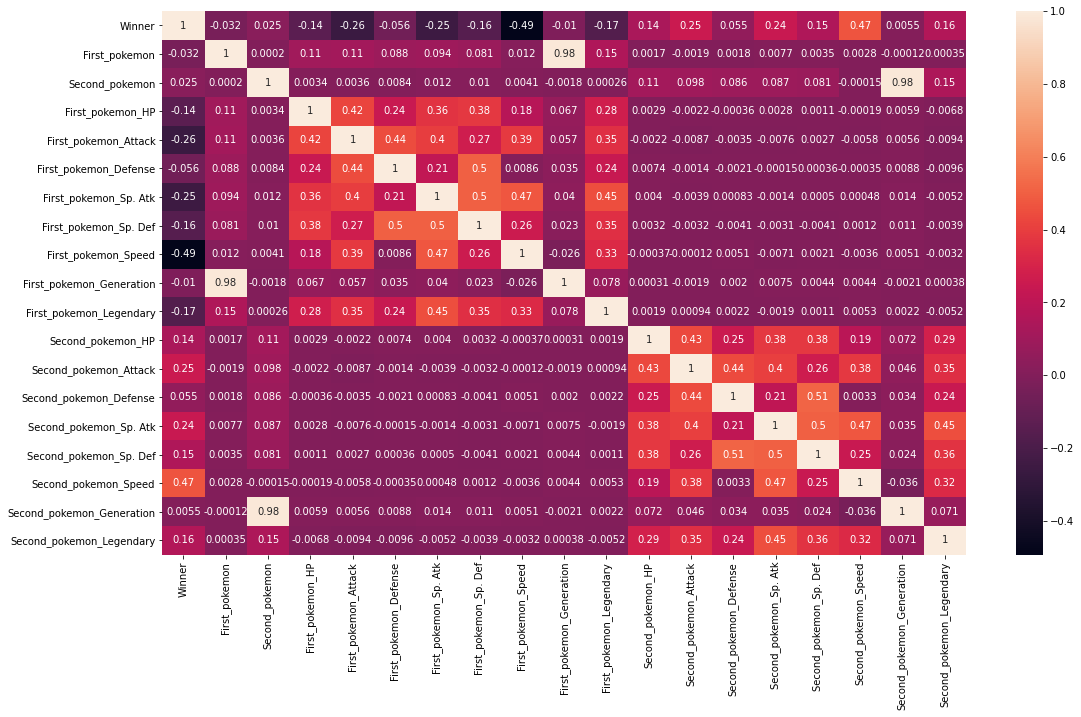

In [809]:
plt.figure(figsize=(18,10))
corr = train_merge.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

In questa correlazione  vi sono alcune features che possiamo eliminare. 


Le features che possiamo eliminare sono: First_pokemon, Second_pokemon, First_pokemon_Defense, Second_pokemon_Defense, First_pokemon_Generation, Second_pokemon_Generation

In [810]:
train_merge.drop(['First_pokemon'], axis=1, inplace=True)
test_merge.drop(['First_pokemon'], axis=1, inplace=True)

In [811]:
train_merge.drop(['Second_pokemon'], axis=1, inplace=True)
test_merge.drop(['Second_pokemon'], axis=1, inplace=True)

In [812]:
train_merge.drop(['First_pokemon_Generation'], axis=1, inplace=True)
test_merge.drop(['First_pokemon_Generation'], axis=1, inplace=True)

In [813]:
train_merge.drop(['Second_pokemon_Generation'], axis=1, inplace=True)
test_merge.drop(['Second_pokemon_Generation'], axis=1, inplace=True)

In [814]:
train_merge.drop(['Second_pokemon_Defense'], axis=1, inplace=True)
test_merge.drop(['Second_pokemon_Defense'], axis=1, inplace=True)

In [815]:
train_merge.drop(['First_pokemon_Defense'], axis=1, inplace=True)
test_merge.drop(['First_pokemon_Defense'], axis=1, inplace=True)

In [816]:
test_merge.dtypes

Winner                       int64
First_pokemon_Name          object
First_pokemon_Type 1        object
First_pokemon_Type 2        object
First_pokemon_HP             int64
First_pokemon_Attack         int64
First_pokemon_Sp. Atk        int64
First_pokemon_Sp. Def        int64
First_pokemon_Speed          int64
First_pokemon_Legendary       bool
Second_pokemon_Name         object
Second_pokemon_Type 1       object
Second_pokemon_Type 2       object
Second_pokemon_HP            int64
Second_pokemon_Attack        int64
Second_pokemon_Sp. Atk       int64
Second_pokemon_Sp. Def       int64
Second_pokemon_Speed         int64
Second_pokemon_Legendary      bool
dtype: object

In [817]:
train_merge.dtypes

Winner                       int64
First_pokemon_Name          object
First_pokemon_Type 1        object
First_pokemon_Type 2        object
First_pokemon_HP             int64
First_pokemon_Attack         int64
First_pokemon_Sp. Atk        int64
First_pokemon_Sp. Def        int64
First_pokemon_Speed          int64
First_pokemon_Legendary       bool
Second_pokemon_Name         object
Second_pokemon_Type 1       object
Second_pokemon_Type 2       object
Second_pokemon_HP            int64
Second_pokemon_Attack        int64
Second_pokemon_Sp. Atk       int64
Second_pokemon_Sp. Def       int64
Second_pokemon_Speed         int64
Second_pokemon_Legendary      bool
dtype: object

In [818]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Winner                    32000 non-null  int64 
 1   First_pokemon_Name        31963 non-null  object
 2   First_pokemon_Type 1      32000 non-null  object
 3   First_pokemon_Type 2      16628 non-null  object
 4   First_pokemon_HP          32000 non-null  int64 
 5   First_pokemon_Attack      32000 non-null  int64 
 6   First_pokemon_Sp. Atk     32000 non-null  int64 
 7   First_pokemon_Sp. Def     32000 non-null  int64 
 8   First_pokemon_Speed       32000 non-null  int64 
 9   First_pokemon_Legendary   32000 non-null  bool  
 10  Second_pokemon_Name       31966 non-null  object
 11  Second_pokemon_Type 1     32000 non-null  object
 12  Second_pokemon_Type 2     16618 non-null  object
 13  Second_pokemon_HP         32000 non-null  int64 
 14  Second_pokemon_Attack 

In [819]:
test_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Winner                    8000 non-null   int64 
 1   First_pokemon_Name        7992 non-null   object
 2   First_pokemon_Type 1      8000 non-null   object
 3   First_pokemon_Type 2      4108 non-null   object
 4   First_pokemon_HP          8000 non-null   int64 
 5   First_pokemon_Attack      8000 non-null   int64 
 6   First_pokemon_Sp. Atk     8000 non-null   int64 
 7   First_pokemon_Sp. Def     8000 non-null   int64 
 8   First_pokemon_Speed       8000 non-null   int64 
 9   First_pokemon_Legendary   8000 non-null   bool  
 10  Second_pokemon_Name       7994 non-null   object
 11  Second_pokemon_Type 1     8000 non-null   object
 12  Second_pokemon_Type 2     4199 non-null   object
 13  Second_pokemon_HP         8000 non-null   int64 
 14  Second_pokemon_Attack   

Considerazione: un ulteriore features che può essere tolto in quanto non influisce è il Name

In [820]:
train_merge.drop(['First_pokemon_Name'], axis=1, inplace=True)
test_merge.drop(['First_pokemon_Name'], axis=1, inplace=True)
train_merge.drop(['Second_pokemon_Name'], axis=1, inplace=True)
test_merge.drop(['Second_pokemon_Name'], axis=1, inplace=True)

In [821]:
train_merge.dtypes

Winner                       int64
First_pokemon_Type 1        object
First_pokemon_Type 2        object
First_pokemon_HP             int64
First_pokemon_Attack         int64
First_pokemon_Sp. Atk        int64
First_pokemon_Sp. Def        int64
First_pokemon_Speed          int64
First_pokemon_Legendary       bool
Second_pokemon_Type 1       object
Second_pokemon_Type 2       object
Second_pokemon_HP            int64
Second_pokemon_Attack        int64
Second_pokemon_Sp. Atk       int64
Second_pokemon_Sp. Def       int64
Second_pokemon_Speed         int64
Second_pokemon_Legendary      bool
dtype: object

In [822]:
test_merge.dtypes

Winner                       int64
First_pokemon_Type 1        object
First_pokemon_Type 2        object
First_pokemon_HP             int64
First_pokemon_Attack         int64
First_pokemon_Sp. Atk        int64
First_pokemon_Sp. Def        int64
First_pokemon_Speed          int64
First_pokemon_Legendary       bool
Second_pokemon_Type 1       object
Second_pokemon_Type 2       object
Second_pokemon_HP            int64
Second_pokemon_Attack        int64
Second_pokemon_Sp. Atk       int64
Second_pokemon_Sp. Def       int64
Second_pokemon_Speed         int64
Second_pokemon_Legendary      bool
dtype: object

## Label encoding per i restanti object

In [823]:
labelEncoder = LabelEncoder()

Legendary

In [824]:
test_merge['First_pokemon_Legendary']=labelEncoder.fit_transform(test_merge['First_pokemon_Legendary'])
train_merge['First_pokemon_Legendary']=labelEncoder.fit_transform(train_merge['First_pokemon_Legendary'])
test_merge['Second_pokemon_Legendary']=labelEncoder.fit_transform(test_merge['Second_pokemon_Legendary'])
train_merge['Second_pokemon_Legendary']=labelEncoder.fit_transform(train_merge['Second_pokemon_Legendary'])

In [825]:
test_merge.dtypes

Winner                       int64
First_pokemon_Type 1        object
First_pokemon_Type 2        object
First_pokemon_HP             int64
First_pokemon_Attack         int64
First_pokemon_Sp. Atk        int64
First_pokemon_Sp. Def        int64
First_pokemon_Speed          int64
First_pokemon_Legendary      int64
Second_pokemon_Type 1       object
Second_pokemon_Type 2       object
Second_pokemon_HP            int64
Second_pokemon_Attack        int64
Second_pokemon_Sp. Atk       int64
Second_pokemon_Sp. Def       int64
Second_pokemon_Speed         int64
Second_pokemon_Legendary     int64
dtype: object

In [826]:
train_merge.dtypes

Winner                       int64
First_pokemon_Type 1        object
First_pokemon_Type 2        object
First_pokemon_HP             int64
First_pokemon_Attack         int64
First_pokemon_Sp. Atk        int64
First_pokemon_Sp. Def        int64
First_pokemon_Speed          int64
First_pokemon_Legendary      int64
Second_pokemon_Type 1       object
Second_pokemon_Type 2       object
Second_pokemon_HP            int64
Second_pokemon_Attack        int64
Second_pokemon_Sp. Atk       int64
Second_pokemon_Sp. Def       int64
Second_pokemon_Speed         int64
Second_pokemon_Legendary     int64
dtype: object

<AxesSubplot:>

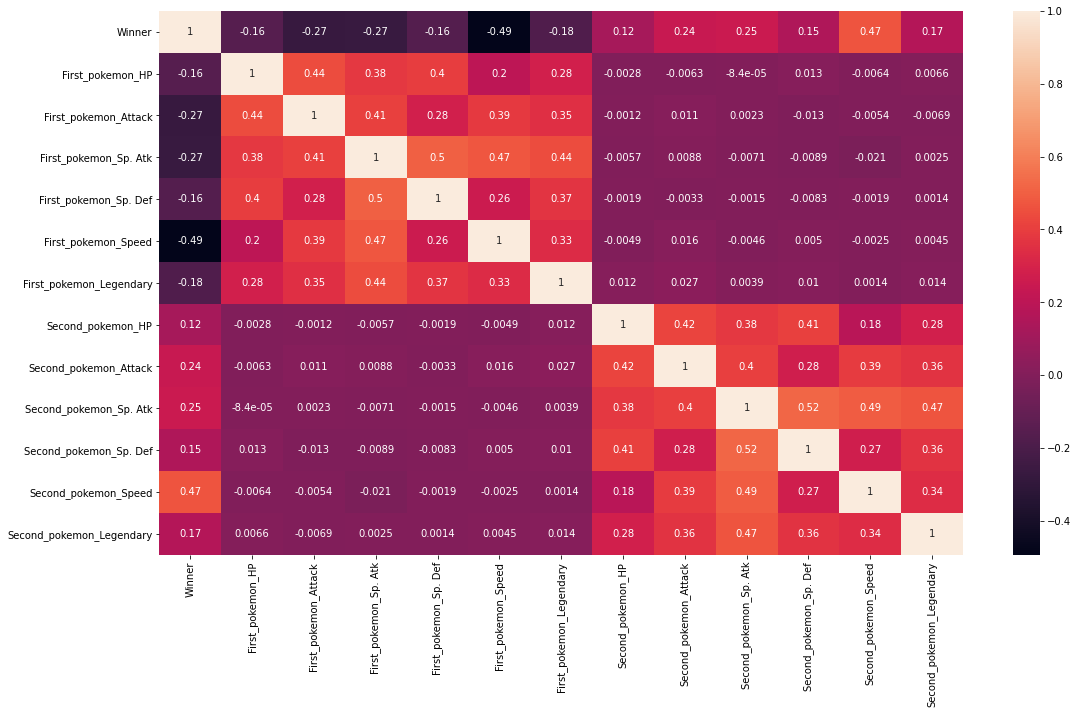

In [827]:
plt.figure(figsize=(18,10))
corr = test_merge.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Da questa correlazione si può capire che legendary non può essere droppata

First_pokemon_Type 1

In [828]:
train_merge['First_pokemon_Type 1']=labelEncoder.fit_transform(train_merge['First_pokemon_Type 1'])
test_merge['First_pokemon_Type 1']=labelEncoder.fit_transform(test_merge['First_pokemon_Type 1'])

In [829]:
train_merge.dtypes

Winner                       int64
First_pokemon_Type 1         int32
First_pokemon_Type 2        object
First_pokemon_HP             int64
First_pokemon_Attack         int64
First_pokemon_Sp. Atk        int64
First_pokemon_Sp. Def        int64
First_pokemon_Speed          int64
First_pokemon_Legendary      int64
Second_pokemon_Type 1       object
Second_pokemon_Type 2       object
Second_pokemon_HP            int64
Second_pokemon_Attack        int64
Second_pokemon_Sp. Atk       int64
Second_pokemon_Sp. Def       int64
Second_pokemon_Speed         int64
Second_pokemon_Legendary     int64
dtype: object

In [830]:
test_merge.dtypes

Winner                       int64
First_pokemon_Type 1         int32
First_pokemon_Type 2        object
First_pokemon_HP             int64
First_pokemon_Attack         int64
First_pokemon_Sp. Atk        int64
First_pokemon_Sp. Def        int64
First_pokemon_Speed          int64
First_pokemon_Legendary      int64
Second_pokemon_Type 1       object
Second_pokemon_Type 2       object
Second_pokemon_HP            int64
Second_pokemon_Attack        int64
Second_pokemon_Sp. Atk       int64
Second_pokemon_Sp. Def       int64
Second_pokemon_Speed         int64
Second_pokemon_Legendary     int64
dtype: object

First_pokemon_Type 1

<AxesSubplot:xlabel='First_pokemon_Type 1', ylabel='count'>

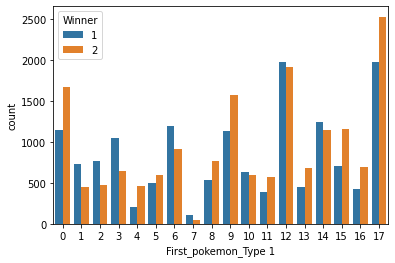

In [831]:
sns.countplot(x=train_merge["First_pokemon_Type 1"], hue=train["Winner"])

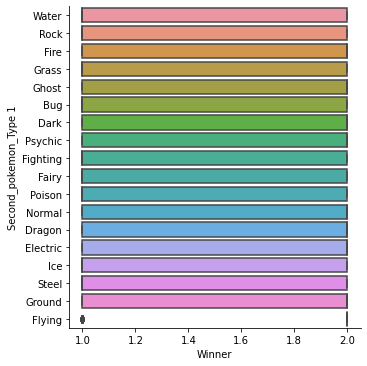

In [832]:
sns.catplot(x="Winner", y="Second_pokemon_Type 1", data=train_merge, kind="box")

Second_pokemon_Type 1

In [833]:
train_merge['Second_pokemon_Type 1']=labelEncoder.fit_transform(train_merge['Second_pokemon_Type 1'])
test_merge['Second_pokemon_Type 1']=labelEncoder.fit_transform(test_merge['Second_pokemon_Type 1'])

<AxesSubplot:xlabel='Second_pokemon_Type 1', ylabel='count'>

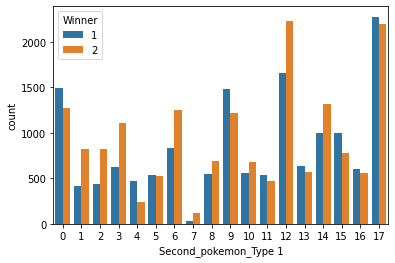

In [834]:
sns.countplot(x=train_merge["Second_pokemon_Type 1"], hue=train_merge["Winner"])

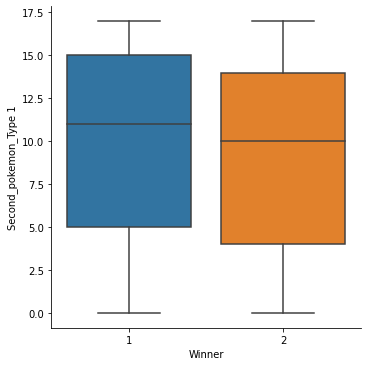

In [835]:
sns.catplot(x="Winner", y="Second_pokemon_Type 1", data=train_merge, kind="box")

<AxesSubplot:>

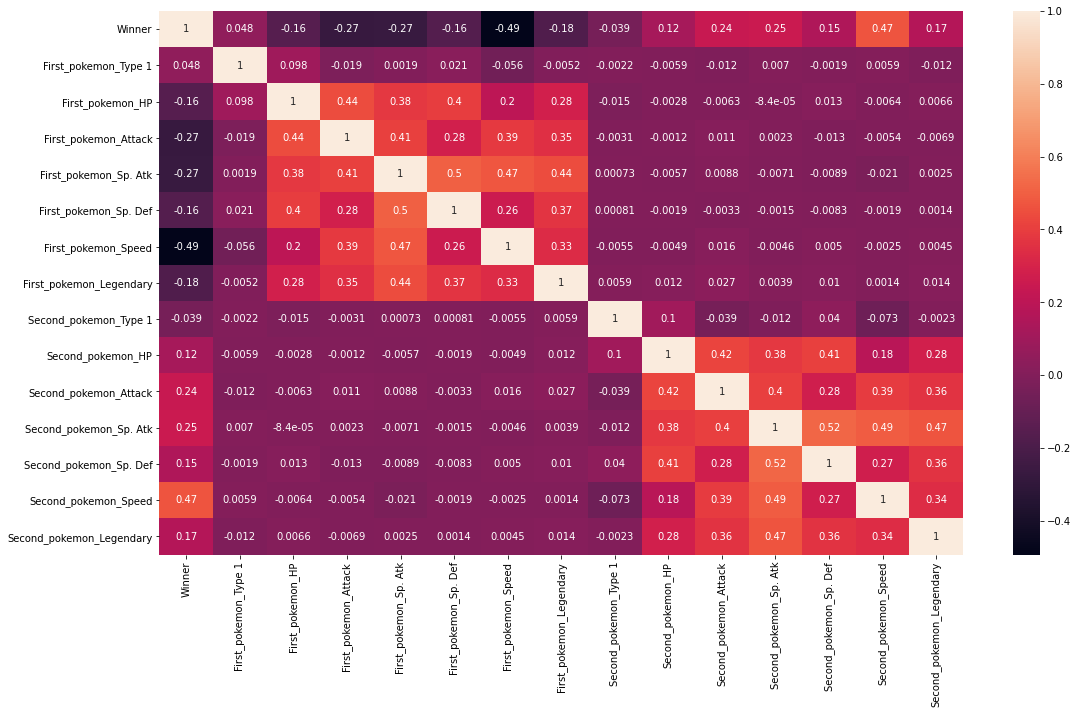

In [836]:
plt.figure(figsize=(18,10))
corr = test_merge.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

Dai grafici precedenti e dalla correlazione bassa ho deciso di eliminare  First_pokemon_Type 1 e Second_pokemon_Type 1

In [837]:
train_merge.drop(['First_pokemon_Type 1'], axis=1, inplace=True)
test_merge.drop(['First_pokemon_Type 1'], axis=1, inplace=True)
train_merge.drop(['Second_pokemon_Type 1'], axis=1, inplace=True)
test_merge.drop(['Second_pokemon_Type 1'], axis=1, inplace=True)

First_pokemon_Type 2 e Second_pokemon_Type 2

In [838]:
test_merge['First_pokemon_Type 2']=labelEncoder.fit_transform(test_merge['First_pokemon_Type 2'])


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [841]:
#fit_transform = labelEncoder.fit_transform
#train_merge["First_pokemon_Type 2"] = train_merge.fit_transform(features["First_pokemon_Type 2"].fillna('0'))


In [842]:
#train_merge['First_pokemon_Type 2']=labelEncoder.fit_transform(train_merge['First_pokemon_Type 2'])
#test_merge['Second_pokemon_Type 2']=labelEncoder.fit_transform(test_merge['Second_pokemon_Type 2'])
#train_merge['Second_pokemon_Type 2']=labelEncoder.fit_transform(train_merge['Second_pokemon_Type 2'])

In [843]:
train_merge.drop(['First_pokemon_Type 2'], axis=1, inplace=True)
test_merge.drop(['First_pokemon_Type 2'], axis=1, inplace=True)
train_merge.drop(['Second_pokemon_Type 2'], axis=1, inplace=True)
test_merge.drop(['Second_pokemon_Type 2'], axis=1, inplace=True)

In [844]:
train_merge.dtypes

Winner                      int64
First_pokemon_HP            int64
First_pokemon_Attack        int64
First_pokemon_Sp. Atk       int64
First_pokemon_Sp. Def       int64
First_pokemon_Speed         int64
First_pokemon_Legendary     int64
Second_pokemon_HP           int64
Second_pokemon_Attack       int64
Second_pokemon_Sp. Atk      int64
Second_pokemon_Sp. Def      int64
Second_pokemon_Speed        int64
Second_pokemon_Legendary    int64
dtype: object

In [845]:
test_merge.dtypes

Winner                      int64
First_pokemon_HP            int64
First_pokemon_Attack        int64
First_pokemon_Sp. Atk       int64
First_pokemon_Sp. Def       int64
First_pokemon_Speed         int64
First_pokemon_Legendary     int64
Second_pokemon_HP           int64
Second_pokemon_Attack       int64
Second_pokemon_Sp. Atk      int64
Second_pokemon_Sp. Def      int64
Second_pokemon_Speed        int64
Second_pokemon_Legendary    int64
dtype: object

## Separated dataset from labels

In [846]:
features = train_merge.columns.drop('Winner')
x_train = train_merge[features]
y_train = train_merge['Winner']

In [847]:
x_test = test_merge[features]
y_test = test_merge['Winner']

## Accuracy

Decision tree

In [848]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
print(f'Accuracy of training set: {tree.score(x_train, y_train)*100}%')

Accuracy of training set: 100.0%


In [849]:
print(f'Accuracy of test set: {tree.score(x_test, y_test)*100}%')

Accuracy of test set: 92.225%


Random forest

RandomForest è un algoritmo che (a differenza del DecisionTree) genera molteplici alberi.

In [850]:
model = RandomForestClassifier() 
model.fit(x_train, y_train)
print(f'Accuracy of training set: {model.score(x_train, y_train)*100}%')

Accuracy of training set: 100.0%


In [851]:
print(f'Accuracy of test set: {model.score(x_test, y_test)*100}%')


Accuracy of test set: 94.8%
